In [55]:
import parse
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn import datasets, linear_model
# Display plots inline and change default figure size
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [70]:
var_names, data, labels = parse.start()

In [71]:
data, labels = np.array(data), np.array(labels)

In [74]:
diabetes = datasets.load_diabetes()
x_train, x_test = diabetes.data[:-20], diabetes.data[-20:]
y_train, y_pred = diabetes.target[:-20], diabetes.target[-20:]

In [75]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
print reg.coef_

[  3.03499549e-01  -2.37639315e+02   5.10530605e+02   3.27736980e+02
  -8.14131709e+02   4.92814588e+02   1.02848452e+02   1.84606489e+02
   7.43519617e+02   7.60951722e+01]


In [76]:
predictions = reg.predict(x_test)
for i in range(len(predictions)):
    print "predicted price: " + str(predictions[i]) + ", actual price: " + str(y_pred[i])
mse = np.mean( (predictions - y_pred)**2)
print "mean squared error: " + str(mse)
explained_variance = reg.score(x_test, y_pred)
print "explaiend variance: " + str(explained_variance)


predicted price: 197.618469075, actual price: 233.0
predicted price: 155.439793275, actual price: 91.0
predicted price: 172.886651473, actual price: 111.0
predicted price: 111.535372785, actual price: 152.0
predicted price: 164.800547836, actual price: 120.0
predicted price: 131.069548749, actual price: 67.0
predicted price: 259.12237761, actual price: 310.0
predicted price: 100.479351568, actual price: 94.0
predicted price: 117.060105197, actual price: 183.0
predicted price: 124.305035548, actual price: 66.0
predicted price: 218.366327925, actual price: 173.0
predicted price: 61.1983128379, actual price: 72.0
predicted price: 132.250467511, actual price: 49.0
predicted price: 120.333292499, actual price: 64.0
predicted price: 52.5445869128, actual price: 48.0
predicted price: 194.037980883, actual price: 178.0
predicted price: 102.571397023, actual price: 104.0
predicted price: 123.566049867, actual price: 132.0
predicted price: 211.034631703, actual price: 220.0
predicted price: 52.6

In [77]:
reg.fit(data, labels)
print reg.coef_
print data.shape

[ -3.03961780e+00  -1.32676491e+02  -1.17735612e+03  -4.45166190e+00
   3.76599876e-01   3.80504922e+04  -3.14680011e+03  -1.08076970e+03
   5.56671051e+03  -3.73786495e+04  -1.74284452e+03   7.33032611e+03
  -1.81306073e+02   2.49216166e+03   1.15892873e+04  -3.33343964e+03
   2.71624855e+03   1.63940466e+04   5.93503234e+03   3.99464967e+02
   3.16072875e+01  -2.37158547e+03   5.83417884e+03   8.14507959e+02
  -1.23712207e+02  -1.23997737e+02   1.84989297e+01  -1.90850598e+03
  -1.16483573e+02  -1.78652947e+03   3.07403201e+03  -1.90998644e+02
  -3.09945557e+03   2.91692729e+01   9.48766442e+00   1.30958307e+03
  -1.34005327e+00  -2.06526284e+00   6.08234831e+00  -3.38729274e+03
   4.18822204e+02   4.53592354e+03  -7.71341748e+02   1.65727257e+01
   2.82834399e+01  -9.30910697e+00   3.55470587e+01   6.96885302e+03
   2.29526272e+03   4.12624888e+03   1.46416744e+03  -8.26060081e+03
  -2.35793553e+04   6.20620075e+02   3.53900592e+03   5.85778376e+02
   7.34086363e+03  -1.70250428e+03

In [78]:
predictions = reg.predict(data)
for i in range(100, 110):
    print "predicted price: " + str(predictions[i]) + ", actual price: " + str(labels[i])
mse = np.mean( (predictions - labels)**2)
print "mean squared error: " + str(mse)
explained_variance = reg.score(data, labels)
print "explaiend variance: " + str(explained_variance)


predicted price: 229786.843824, actual price: 205000
predicted price: 177582.901057, actual price: 178000
predicted price: 105026.995887, actual price: 118964
predicted price: 193857.595726, actual price: 198900
predicted price: 171247.175625, actual price: 169500
predicted price: 248044.174216, actual price: 250000
predicted price: 76636.7696959, actual price: 100000
predicted price: 95461.6799477, actual price: 115000
predicted price: 118106.807661, actual price: 115000
predicted price: 222825.354882, actual price: 190000
mean squared error: 1019659385.25
explaiend variance: 0.838323518943


(1460,)
(1460,)
(1460, 80)
(1460,)
(1168, 80)
(292, 80)
1460
(1168,)
(292,)


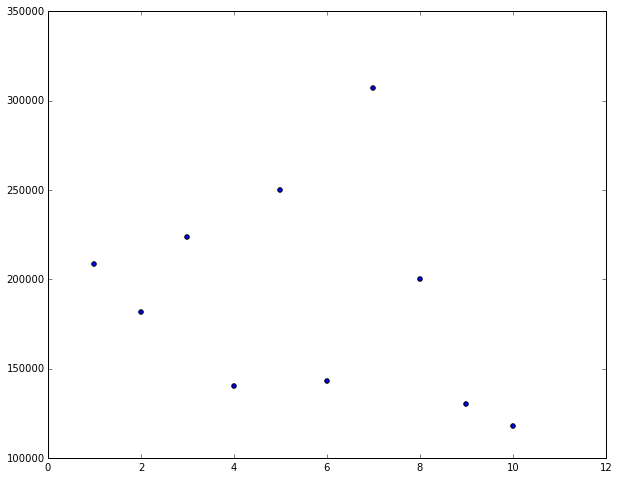

In [131]:
print labels.shape
print data[:,1].shape
plt.scatter(data[0:10, 0], labels[0:10])
print data.shape
print labels.shape
train = data[:int(data.shape[0]*0.8),:]
test = data[int(data.shape[0]*.8):,:]
print train.shape
print test.shape
print train.shape[0] + test.shape[0]
train_labels = labels[:int(labels.shape[0]*.8)]
test_labels = labels[int(data.shape[0]*.8):]
print train_labels.shape
print test_labels.shape

In [100]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 80)
pca.fit(data)
d = pca.transform(data)
print d.shape

(1460, 80)


In [101]:
reg.fit(d, labels)
print reg.coef_

[ -2.11052099e+00   8.38879395e+01  -2.48095703e+00   1.73849487e+01
   1.88146973e+00   5.73706055e+00  -1.75040283e+01   5.39204102e+01
   7.15068359e+01  -4.32285156e+01   9.10651093e+01   3.35974121e+01
  -4.88034058e+01   3.79438782e+01  -3.32803955e+01  -5.07509766e+01
   5.31635132e+01   3.64031525e+02   1.41517334e+02   3.86406250e+02
   5.90668457e+02  -1.72885498e+02  -3.94984009e+02   2.64309082e+02
   3.32960861e+02   3.50794487e+01  -4.25043250e+03   8.26384903e+02
   3.25656445e+03   4.12147892e+03   2.66507756e+03  -1.62085236e+03
   2.51773041e+02  -5.40284772e+03  -3.63386142e+03   8.79967354e+02
   9.33097839e+00  -7.94949066e+02  -6.50371765e+02   4.37445633e+03
  -1.26662956e+03  -1.47486004e+04  -3.75500757e+03   1.03543402e+03
  -2.88290285e+03  -3.24084665e+03  -2.05108601e+03   1.73463863e+03
  -8.09817526e+03   4.01132172e+03  -2.55980147e+03  -1.00231940e+03
  -2.41269176e+03  -2.23924002e+03   2.30875972e+03  -8.24125732e+02
  -6.04558685e+02  -6.63182549e+03

In [102]:
predictions = reg.predict(d)
for i in range(100,110):
    print "predicted price: " + str(predictions[i]) + ", actual price: " + str(labels[i])
mse = np.mean( (predictions - labels)**2)
print "mean squared error: " + str(mse)
explained_variance = reg.score(d, labels)
print "explaiend variance: " + str(explained_variance)

predicted price: 229789.254385, actual price: 205000
predicted price: 177577.898604, actual price: 178000
predicted price: 105032.291038, actual price: 118964
predicted price: 193843.763422, actual price: 198900
predicted price: 171254.154806, actual price: 169500
predicted price: 248029.263594, actual price: 250000
predicted price: 76645.1988064, actual price: 100000
predicted price: 95453.5682274, actual price: 115000
predicted price: 118115.000676, actual price: 115000
predicted price: 222812.303452, actual price: 190000
mean squared error: 1019531156.35
explaiend variance: 0.838343850829


In [133]:
error = 0
for i in range(len(predictions)):
    diff = abs(predictions[i] - labels[i])
    error+=diff
print error/float(len(labels))
e = sum(abs(predictions - labels))/float(len(labels))
print e

20080.5669955
20080.5669955


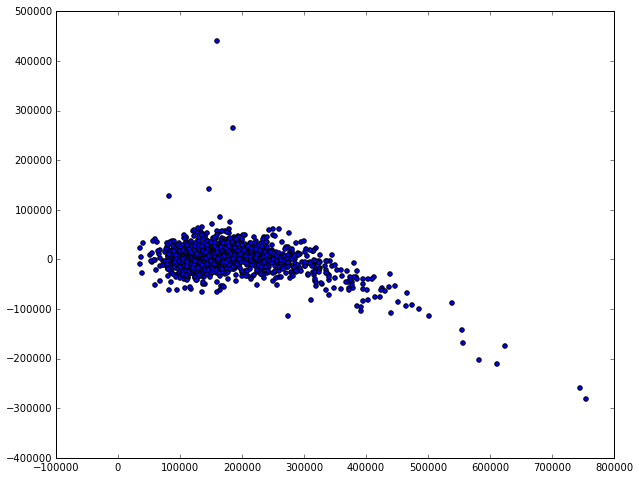

In [122]:
plt.scatter(labels,list((predictions-labels)))